In [189]:
import sympy
import numpy as np
from sympy import Matrix, latex, evalf
from sympy import pi as Pi
from sympy import cos as Cos
from sympy import sin as Sin
import matplotlib.pyplot as plt
from IPython.display import Latex
from google.colab import files
import pandas as pd

# Практическое занятие 13
# Компьютерный практикум по алгебре на Python
## Линейные операторы на плоскости и в пространстве
### Задание 1.
Написать функцию, составляющую матрицу линейного оператора поворота на $\alpha$ градусов или радиан **по** или **против часовой стрелки** на плоскости. Параметры: обязательные - угол поворота, необязательные - тип меры угла (градусы или радианы), направление поворота (по или против часовой стрелки). Значения по умолчанию - против часовой стрелки в радианах.

Использовать полученную функцию для выведения на экран координат векторов, полученных поворотом вектора [1, 2]

1) на 10, 20, 45 градусов **по  часовой стрелке**

2) на $\pi/3$ радиан **против часовой стрелки**.

In [ ]:
alpha = sympy.Symbol("alpha")

def LineralRotationOperator(alpha_var, radians = True, clockwise = False):
  if (radians == False):
    alpha_var = sympy.simplify(sympy.pi * alpha_var/180)
  if (clockwise == True):
    alpha_var = -alpha_var
  A = Matrix([[Cos(alpha_var), -Sin(alpha_var)], [Sin(alpha_var), Cos(alpha_var)]])
  return A

vec_1 = Matrix([1, 2])
lst_params = [(10, False, True), (20, False, True), (45, False, True), (sympy.S(sympy.pi)/3, True, False)]

display(Latex(fr"V = {latex(vec_1)}"))
for i in range(len(lst_params)):
  val, radsBool, clockwiseBool = lst_params[i]
  vec_new = sympy.simplify(LineralRotationOperator(val, radsBool, clockwiseBool) * vec_1)
  display(Latex(fr"[{latex(i + 1)}]. \ V_{{new}}\ = {latex(vec_new)}"))
  print()


### Задание 2.
Найти собственные числа и собственные векторы линейного оператора, заданного матрицей
$$
\left(\begin{matrix}
-34&20&-5\\
-40&56&-20\\
20&-8&50
\end{matrix}\right)
$$
Воспользоваться eigenvals и eigenvects, проверить выполнение равенства нулю характеристического многочлена $|A-\lambda E|$ и условия $Ax=\lambda x$.


In [ ]:
# Функция проверки числа на собственность матрице
def CheckEigenvalue(mx, var_num):
  numIsCorrect = False
  if ((mx - var_num * sympy.eye(mx.shape[0])).det() == 0):
    numIsCorrect = True
  display(Latex(f"Число \  {var_num} {'не' * (not numIsCorrect)} \  является \  собственным."))

# Функция проверки вектора на собственность матрицы
def CheckEigenvector(mx, eValue, eVector):
  vecIsCorrect = False
  if (mx * eVector == eValue * eVector):
    vecIsCorrect = True
  display(Latex(f"Вектор {latex(eVector.T)} {'не' * (not vecIsCorrect)} \ является \  собственным."))

mx_2 = Matrix([[-34, 20, -5], [-40, 56, -20], [20, -8, 50]])
display(Latex(fr"A = {latex(mx_2)}"))
print()
lstEigenData = mx_2.eigenvects()
for i in range(len(lstEigenData)):
  eNum, eNumNum, lstEVecs = lstEigenData[i]
  display(Latex(fr"[{latex(i + 1)}]\   {latex(eNum)}"))
  CheckEigenvalue(mx_2, eNum)
  for j in range(len(lstEVecs)):
    curVec = lstEVecs[j]
    display(Latex(fr"[{latex(i + 1 + ((j + 1)/10))}]. {latex(curVec.T)}"))
    CheckEigenvector(mx_2, eNum, curVec)
  print()

### Задание 3.
Построить матрицу оператора из задания 2 в базисе из векторов $(1,1,1)$, $(0,5,3)$ и $(1,6,0)$.Вывести на экран матрицу перехода к новому базису и матрицу оператора в новом базисе.


In [ ]:
P_3 = Matrix([[1, 1, 1], [0, 5, 3], [1, 6, 0]]).T
A_3_new = P_3.inv() * mx_2 * P_3
display(Latex(fr"A = {latex(mx_2)}"))
display(Latex(fr"\text{{Матрица перехода P = }} {latex(P_3)} \ , \  A_{{new}} = {latex(A_3_new)}"))

### Задание 4.
Построить матрицу оператора из задания 2 в базисе из собственных векторов с помощью eigenvects и матрицы перехода. Сравнить диагональные элементы с собственными числами.

In [ ]:
# Функция для нахождения матрицы перехода в базис из собственных векторов
def EigenTransitionMx(mx):
  lstEigenData = mx.eigenvects()
  transitionMx = Matrix()
  for i in range(len(lstEigenData)):
    for eVec in lstEigenData[i][2]:
      transitionMx = transitionMx.row_join(eVec)
  return transitionMx

# Функция для сравнения диагональных эл-тов матрицы в базисе из собственных векторов
# и собственных чисел матрицы
def CheckDiagElemetsETM(mx, etm):
  setEnums = set([mx.eigenvects()[i][0] for i in range(len(mx.eigenvects()))])
  setDiagNums = set([etm[i, i] for i in range(etm.shape[0])])
  print(f"\nДиагональные элементы {'не' * (setEnums != setDiagNums)}совпадают с собственными числами")


P_4 = EigenTransitionMx(mx_2)
A_4_new = P_4.inv() * mx_2 * P_4
display(Latex(fr"A = {latex(mx_2)}, A_{{new}} = {latex(A_4_new)}"))
CheckDiagElemetsETM(mx_2, A_4_new)

### Задание 5*.
Изобразить на графике вектор $a(-1, 1)$ и результаты его поворота

1) на 30, 45, 90 градусов **по  часовой стрелке** (имена $v_1$, $v_2$, $v_3$)

2) на $\pi/6$ и $2\pi/3$ радиан **против часовой стрелки** (имена $w_1$, $w_2$).

**Указание:** описать функцию, возвращающую угол поворота на плоскости против часовой стрелки в радианах. Агрументы функции: угол поворота, тип меры угла (градусы или радианы), направление поворота (по или против часовой стрелки). С помощью этой функции  составить словарь с ключами - именами векторов, значениями - углами  поворота против часовой стрелки в радианах, использовать в цикле этот словарь для изображения векторов на графике.

В легенде графика для каждого вектора указать его имя и координаты. Для корректного представления координат в легенде нужно отдельно выделить каждую координату.

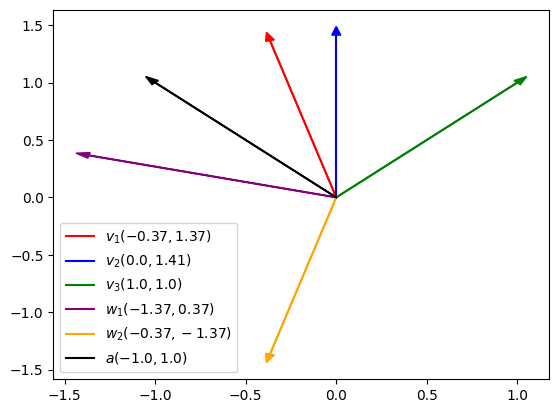

In [160]:
v1, v2, v3, w1, w2, a = sympy.symbols("v1, v2, v3, w1, w2 a")
# Функция для конвертации угла поворота в угол поворота по часовой стрелке в радианах
def ConvertAngle(alpha_var, radians = True, clockwise = False):
  if (radians == False):
    alpha_var = sympy.simplify(sympy.pi * alpha_var/180)
  if (clockwise == True):
    alpha_var = -alpha_var
  return alpha_var

ax = plt.gca()
# Функция для изображения вектора на графике
def plotVec(vect, color_var, name, axCur):
    x, y = [float(item) for item in vect]
    axCur.plot([0, x], [0, y], color = color_var, label = fr"${latex(name)} ({latex(round(x, 2))}, {latex(round(y, 2))})$")
    axCur.arrow(0, 0, x, y, head_width=0.05, color = color_var)

vec_a = Matrix([-1, 1])
lstRandomColors = ["red", "blue", "green", "purple", "orange", "black"]
lstAngleData = [(30, False, True, v1), (45, False, True, v2), (90, False, True, v3), (sympy.S(sympy.pi)/6, True, False, w1), (2 * sympy.S(sympy.pi)/3, True, False, w2)]
dctAngles = {angleData[3]:ConvertAngle(angleData[0], angleData[1], angleData[2]) for angleData in lstAngleData}
dctAngles[a] = 0

cnt = 0
for i in dctAngles.keys():
  new_vec = LineralRotationOperator(dctAngles[i]) * vec_a
  plotVec(new_vec, lstRandomColors[cnt], i, ax)
  cnt += 1
ax.legend(loc = "best")

# Задание 6*
Считать из файла "task_13_6.xlsx" координаты векторов на плоскости и углы поворота (крайний левый столбец в файле содержит имена векторов, следующие два - координаты векторов, затем угол поворота и последний столбец содержит текст "rad" или "deg", т.е. угол в радианах или градусах).

Для каждого вектора найти координаты вектора, полученного в результате поворота, затем записать в файл  "task_13_6_ans.xlsx" имена векторов  из файла "task_13_6.xlsx" и координаты  векторов, полученных в результате поворота. В файле  "task_13_6_ans.xlsx" подписи строк - имена векторов, подписи столбцов - имена координат, т.е. "x" и "y".

Изобразить на графике вектор [1, 2] из Задания 1 и результаты его поворота (по Заданию 1). В легенде графика для каждого вектора, кроме [1, 2] указать матрицу поворота, а для [1, 2] единичную матрицу.

In [174]:
uploaded_files_dct = files.upload()
file_name = [name for name in uploaded_files_dct.keys()][0]
vectors_df = pd.read_excel(file_name, sheet_name = "Sheet1")

Saving task_13_6.xlsx to task_13_6 (1).xlsx


In [198]:
vectors_df.head()

lst_vec_names = [vectors_df["Unnamed: 0"].iloc[i] for i in range(len(vectors_df))]
lst_coords_data = [Matrix([vectors_df['x'].iloc[i], vectors_df['y'].iloc[i]]) for i in range(len(vectors_df))]
lst_angle_data = [ConvertAngle(vectors_df['angle'].iloc[i], (vectors_df['type'].iloc[i] == 'rad')) for i in range(len(vectors_df))]
lst_x_new = []
lst_y_new = []

for i in range(len(lst_coords_data)):
  cur_vec = lst_coords_data[i]
  cur_angle = lst_angle_data[i]
  vec_new = (LineralRotationOperator(cur_angle) * cur_vec).evalf(5)
  lst_x_new.append(vec_new[0,0])
  lst_y_new.append(vec_new[1, 0])

new_vecs_dct = {"x": lst_x_new, "y": lst_y_new}
new_vecs_df = pd.DataFrame(data = new_vecs_dct, index = lst_vec_names)

file_name_cur = "task_13_6_ans.xlsx"
with pd.ExcelWriter(file_name_cur, mode = "w") as witer_w:
  df_plug = pd.DataFrame([])
  df_plug.to_excel(witer_w, sheet_name = 'Blank', header = False, index = False)
with pd.ExcelWriter(file_name_cur, mode = "a") as writer_2:
  new_vecs_df.to_excel(writer_2, sheet_name = "Ans")

files.download(file_name_cur)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

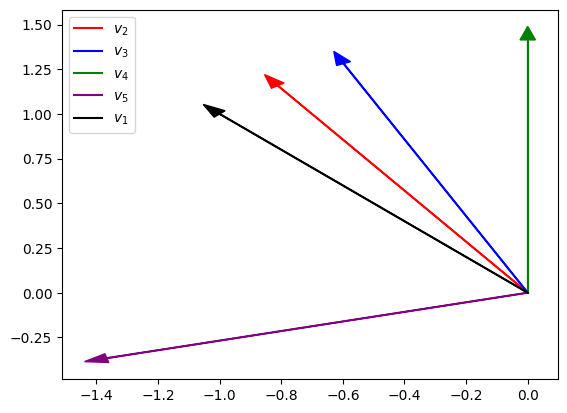

In [169]:
# Функция для изображения вектора на графике
def plotVec(vect, color_var, name, rtMx, axCur):
    x, y = [float(item) for item in vect]
    axCur.plot([0, x], [0, y], color = color_var, label = fr"${latex(name)}$") #label = sympy.latex(rtMx, mode = "inline")
    axCur.arrow(0, 0, x, y, head_width=0.05, color = color_var)
    display(Latex(fr"{latex(name)} \text{{ Rotation Matrix = }} {latex(rtMx)}"))

v1, v2, v3, v4, v5 = sympy.symbols('v1:6')
vec_1 = Matrix([1, 2])
lstAngleData= [(10, False, True, v2), (20, False, True, v3), (45, False, True, v4), (sympy.S(sympy.pi)/3, True, False, v5)]
dctAngles2 = {angleData[3]:ConvertAngle(angleData[0], angleData[1], angleData[2]) for angleData in lstAngleData}
lstRandomColors = ["red", "blue", "green", "purple", "black"]
dctAngles2[v1] = 0

ax2 = plt.gca()

cnt = 0
for i in dctAngles2.keys():
  rotationMx = LineralRotationOperator(dctAngles2[i])
  new_vec = rotationMx * vec_a
  plotVec(new_vec, lstRandomColors[cnt], i, rotationMx, ax2)
  cnt += 1
ax2.legend(loc = "best")

###  Индивидуальное задание
Найти собственные числа и собственные векторы линейного оператора. Построить матрицу оператора в заданном базисе. Построить матрицу оператора в базисе из собственных векторов.

Вывести на экран матрицу оператора А, матрицу перехода к базису ($e_1$, $e_2$, $e_3$), матрицу оператора в базисе ($e_1$, $e_2$, $e_3$), матрицу перехода к базису из собственных векторов, матрицу оператора в базисе из собственных векторов.

Даны матрица оператора A, векторы базиса $e_1$, $e_2$, $e_3$.


Варинат №43

$$A = \left[\begin{matrix}19 & 445 & -348\\63 & 81 & -204\\37 & 43 & -228\end{matrix}\right],\quad e_1 = \left[\begin{matrix}-1\\-1\\1\end{matrix}\right],\quad e_2 = \left[\begin{matrix}3\\-4\\-1\end{matrix}\right],\quad e_3 = \left[\begin{matrix}-2\\3\\-4\end{matrix}\right]$$

In [ ]:
A_ind = Matrix([[19, 445, -348], [63, 81, -204], [37, 43, -228]])
P_ind = Matrix([[-1, -1, 1], [3, -4, -1], [-2, 3, -4]]).T
A_new_ind_1 = P_ind.inv() * A_ind * P_ind
P_ind_eigen = EigenTransitionMx(A_ind)
A_new_ind_2 = P_ind_eigen.inv() * A_ind * P_ind_eigen
lstEData = A_ind.eigenvects()

display(Latex(fr"A = {latex(A_ind)}"))
display(Latex(fr"\text{{Собственные числа и собственные векторы A:}}"))
print()
for i in range(len(lstEData)):
  display(Latex(fr"[{latex(i + 1)}]. \text{{Собственное число  }}  {latex(lstEData[i][0])}"))
  for j in range(len(lstEData[i][2])):
    display(Latex(fr"[{latex(i + 1 + (j + 1)/10)}]. \text{{Собственный вектор для числа }} {latex(lstEData[i][0])}: {latex(lstEData[i][2][j].T)}"))
  print()
display(Latex(fr"\text{{Матрица перехода к базису }} (e_{{1}},e_{{2}},e_{{3}}) \ = {latex(P_ind)} \ , \  A_{{new1}} = {latex(A_new_ind_1)}"))
print()
display(Latex(fr"\text{{Матрица перехода к базису собственных векторов = }} {latex(P_ind_eigen)} \ , \  A_{{new2}} = {latex(A_new_ind_2)}"))